# Hypothesis Testing Exercise

### Question 1: Has the network latency gone up since we switched ISPs?



$H_0$: Network latency will remain the same after the ISP switch.

$H_a$: The new service provider has higher latency

True Positive: We reject $H_0$, our latency is higher with the new provider then it was previously by a significant amount

False Positive: We reject $H_0$, our data says the latency is higher; maybe our data is biased, we recorded data during hours of high internet traffic

False Negative: We fail to reject $H_0$: we took recordings at extremely low internet traffic times

True Negative: There is not a significant difference in latency between the ISPs and we fail to reject $H_0$

### Question 2: Is the website redesign any good?

$H_0$: Our website traffic has no significant changes since the redesign

$H_a$: The webstie traffic has increased since the redesign

True Positive: reject $H_0$, the redesign improved website traffic, shows true based on data

False Positive: reject $H_0$, we conclude that the redesign helped, but really it didn't; our recordings could be biased. May have showed the redesign to loyal customers

False Negative: fail to reject $H_0$, we conclude the redesign did not help, but really it did; our display could have been given to customers who have shown negative feedback in the past

True Negative: fail to reject $H_0$, we conclude the redesign did not help, and it really didn't

### Question 3: Is our TV ad driving more sales?
    -Scenario: We're frito-lay advertising cool ranch doritos.



$H_0$: Cool Ranch doritos don't sell better with advertisements

$H_a$: Sales for Cool Ranch doritos will show a significant increase with the advertisement

False Positive: reject $H_0$; the advertisement helped sales, but really it didn't, there may have been other factors

False Negative: fail to reject $H_0$; we conclude that the ad did not help, but really it did 

True Positive: reject $H_0$; we conclude that the ad helped, and it did, data shows a boost in sales

True Negative: fail to reject $H_0$: we conclude the ad did not boost sales, and really it didn't, there were no significat boost in sales with the advertisement

#### Scenario: suppose we have a production issue while the ad is running -- there's not enough product to sell, sales are low

False Negative: conclude that the ad didn't help, but really it did, with the boost in demand for the product the manufacturing could not keep up. Therefore there was no significant boost in sales.


#### Scenario: suppose there's a global pandemic, and everyone is staying inside while the ad is running. There's increased sales of cool ranch doritos.



False Positive: conclude that the ad helped, when really it didn't, there could be other factors boosting sales, for example: (COVID-19, Storms, anything causing people to stay indoors more and snack)


In [151]:
from math import sqrt
from scipy import stats
from pydataset import data
from datetime import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from env import host, user, password

Question 1: Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [13]:
office1_mean = 90
office1_std = 15
office1_pop = 40

office2_mean = 100
office2_std = 20
office2_pop = 50

alpha = 0.05

In [16]:
sitea = np.random.normal(office1_mean, office1_std, office1_pop)
siteb = np.random.normal(office2_mean, office2_std, office2_pop)
sitea, siteb

(array([125.46240665,  72.21652925,  81.10011892,  77.8336486 ,
        103.59905592,  91.97414644,  80.34428359,  91.10915556,
         92.69389777,  86.71369607,  68.83832351,  93.01983656,
         83.2678787 , 114.07240263,  76.79843173,  77.1897508 ,
         94.69545339,  85.92456662,  63.44270494,  77.6936247 ,
        137.72153521,  85.17766266,  93.39995822,  90.04080423,
         75.60014783, 108.74064223,  95.66278806,  79.67701301,
         96.59812641, 125.24702163,  88.83504429,  79.09218842,
         87.82311465,  96.61565711,  63.28007155,  92.55391298,
         85.86515653,  91.20042063, 102.25427102, 101.04376495]),
 array([156.39435842, 108.96686373, 105.60533736, 129.48136081,
         98.45507931,  94.49159438, 143.36308161,  49.91682369,
        135.05499416,  97.0241988 ,  95.37125473,  91.99278783,
         98.62613345,  77.20427706, 101.71160926,  92.52404396,
         81.54333901, 110.59574159,  93.18093611,  63.9561858 ,
         89.44240878, 116.38844448, 10

In [17]:
sitea.var(), siteb.var()

(247.19921804519345, 437.59637546543746)

In [19]:
t, p = stats.ttestind(sitea, siteb, equal_var = False)
t, p

(-2.192035689126531, 0.031025236281888507)

$H_0$: The average time it takes to sell homes is == for both companies

$H_a$: The average time it takes to sell homes is > for office #2

We reject the $H_0$ because the looking at the t and p values we can see that office number 1 has a significantly quicker sales time per home

We accept the $H_a$ because given a p value less then the alpha value we can say there is a significance in the fact that office 2 takes longer to sell homes than office 1

#### Question 2: Load the mpg dataset and use it to answer the following questions:

In [25]:
mpg = data('mpg')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [26]:
mpg["avg_mpg"] = (mpg.cty + mpg.hwy)/2
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


#### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

$H_0$: The fuel efficiency for 2008 cars == fuel efficiency for 1999 cars

$H_a$: The fuel efficiency for 2008 cars will be better than 1999 cars


<AxesSubplot:>

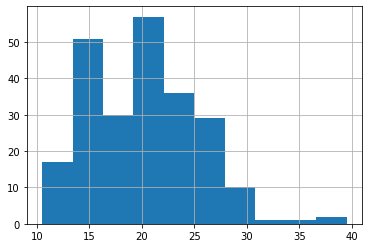

In [28]:
mpg.avg_mpg.hist()  ##normalish distribution

In [29]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


In [73]:
mpg_08 = mpg[mpg.year == 2008].avg_mpg
mpg_99 = mpg[mpg.year == 1999].avg_mpg

mpg_08.mean(), mpg_99.mean()

(20.076923076923077, 20.22222222222222)

<AxesSubplot:>

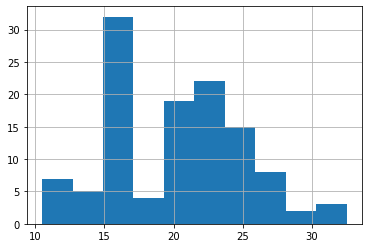

In [40]:
mpg_08.hist()

<AxesSubplot:>

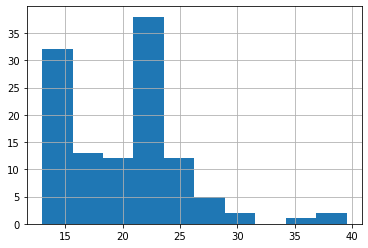

In [41]:
mpg_99.hist()

In [42]:
mpg_08.count(), mpg_99.count()

(117, 117)

In [43]:
mpg_08.var(), mpg_99.var()

(24.097480106100797, 27.122605363984682)

In [74]:
t, p = stats.ttest_ind(mpg_99, mpg_08)
t, p, alpha

(0.21960177245940962, 0.8263744040323578, 0.05)

We accept the $H_0$ because with a .2 t value their is not a significant enough difference in fuel efficiency between 1999 cars and 2008 cars

We reject the $H_a$ because with .2 t value we can not justify saying the 2008 cars are more fuel efficient than the 199 cars

#### Are compact cars more fuel-efficient than the average car?


$H_0$: Compacts cars are == to average cars in terms of fuel efficiency

$H_a$: Compacts cars will have greater fuel efficiency than average cars

In [58]:
mpg_compact = mpg[mpg['class'] == 'compact'].avg_mpg
mpg_average = mpg[mpg['class'] != 'compact'].avg_mpg

<AxesSubplot:>

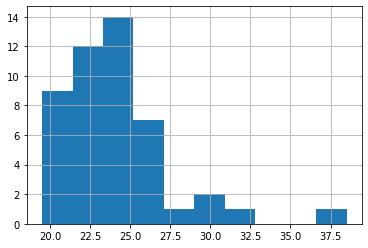

In [59]:
mpg_compact.hist()

<AxesSubplot:>

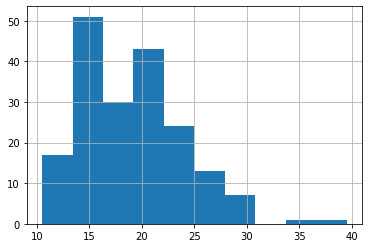

In [60]:
mpg_average.hist()

In [61]:
mpg_compact.count(), mpg_average.count()

(47, 187)

In [62]:
mpg_compact.var(), mpg_average.var()

(12.442876965772433, 23.652794548904602)

In [99]:
t, p = stats.ttest_1samp(mpg_compact, mpg.avg_mpg.mean())
t, p/2, alpha

(7.896888573132535, 2.0992818971585668e-10, 0.05)

We reject the $H_0$ because with a t value of 7.89 and and good confidence interval we can justify saying compact cars do have greater fuel efficiency than average cars

We accept the $H_a$ because with a t value of 7.89 and a good confidence interval we can say that compact cars are more fuel efficient than average cars

#### Do manual cars get better gas mileage than automatic cars?

In [85]:
mpg['transmission'] = np.where(mpg.trans.str.count('auto'), 'automatic', 'manual')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg,transmission
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,automatic
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,manual
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,manual
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,automatic
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5,automatic
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0,manual
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0,automatic
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0,manual


In [87]:
mpg_auto = mpg[mpg.transmission == 'automatic'].avg_mpg
mpg_manual = mpg[mpg.transmission == 'manual'].avg_mpg

mpg_auto.mean(), mpg_manual.mean()

(19.130573248407643, 22.227272727272727)

<AxesSubplot:>

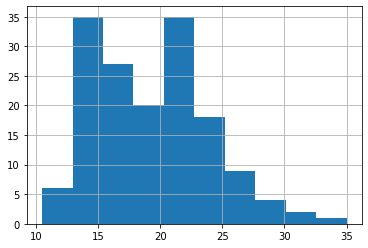

In [88]:
mpg_auto.hist()

<AxesSubplot:>

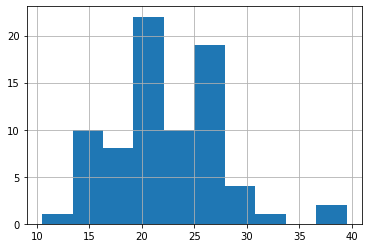

In [90]:
mpg_manual.hist()

In [92]:
mpg_auto.count(), mpg_manual.count()

(157, 77)

In [93]:
mpg_auto.var(), mpg_manual.var()

(21.942777233382337, 26.635167464114826)

In [101]:
t, p = stats.ttest_ind(mpg_manual, mpg_auto, equal_var = False)
t, p, alpha

(4.443514012903071, 1.795224899991793e-05, 0.05)

In [96]:
if (p < alpha) and (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


We accept the $H_a$ because with a t value greater than 0 and a good confidence interval we can justify saying manual cars get better gas mileage than automatic cars on average

# Correlation Exercise 

Question 1: Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

In [106]:
telco = pd.read_csv('cust_telco_churn.csv')
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [120]:
x = telco.tenure
y = telco.MonthlyCharges
y

0        29.85
1        56.95
2        53.85
3        42.30
4        70.70
         ...  
7038     84.80
7039    103.20
7040     29.60
7041     74.40
7042    105.65
Name: MonthlyCharges, Length: 7043, dtype: float64

In [109]:
corr, p = stats.pearsonr(x,y) ###pearson r testing tenure vs monthly charges
corr, p

(0.24789985628615005, 4.0940449915016345e-99)

There is a small positive correlation between tenure and monthly charges. Meaning we could expect to see slight bill increases the longer you are with the company.

In [128]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [131]:
telco['Total_Charges'] = telco.tenure * telco.MonthlyCharges
telco

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Total_Charges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,1936.30
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,107.70
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1903.50
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,141.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,2035.20
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,7430.40
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,325.60
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,297.60


In [133]:
y = telco.Total_Charges

In [134]:
corr, p = stats.pearsonr(x,y) ###pearson r testing tenure vs total charges
corr, p

(0.8265682623515922, 0.0)

There is a strong positive correlation between tenure and total charges. Meaning the longer people stay the more they will pay over time

In [184]:
telco.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [187]:
telco1 = telco[telco.InternetService != 'No']
telco1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Total_Charges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,1936.30
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,107.70
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1903.50
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,141.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,2035.20
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,7430.40
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,325.60
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,297.60


In [189]:
control_df = telco1[telco1.PhoneService != 'No']
control_df ### making a controlled dataframe with only customer who have internet and phone

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Total_Charges
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,1936.3
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,107.7
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,141.4
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,797.2
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,1960.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.10,No,1495.3
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,2035.2
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,7430.4
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,297.6


In [190]:
x = control_df.tenure
y = control_df.MonthlyCharges

corr, p = stats.pearsonr(x,y) ###pearson r testing tenure vs total charges controlling for internet and phone users
corr, p

(0.44311476672821826, 1.0146095231152447e-231)

In [192]:
x = control_df.tenure
y = control_df.Total_Charges

corr, p = stats.pearsonr(x,y) ###pearson r testing tenure vs total charges controlling for internet and phone users
corr, p

(0.9586810298135673, 0.0)

#### Question 2: Use the employees database.
     
   

#### Is there a relationship between how long an employee has been with the company and their salary?

In [138]:
def get_db_url(host,user,password):
    datatable = input('Please enter the database you wish to connect to: ')
    url = f'mysql+pymysql://{user}:{password}@{host}/{datatable}'
    return url

In [143]:
url = get_db_url(host,user,password)
employeesdf = pd.read_sql('SELECT * FROM employees', url)
employeesdf

Please enter the database you wish to connect to: employees


,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
...,...,...,...,...,...,...
300019,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12
300020,499996,1953-03-07,Zito,Baaz,M,1990-09-27
300021,499997,1961-08-03,Berhard,Lenart,M,1986-04-21
300022,499998,1956-09-05,Patricia,Breugel,M,1993-10-13


In [142]:
salariesdf = pd.read_sql('SELECT * FROM salaries', url)
salariesdf

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10001,62102,1987-06-26,1988-06-25
2,10001,66074,1988-06-25,1989-06-25
3,10001,66596,1989-06-25,1990-06-25
4,10001,66961,1990-06-25,1991-06-25
...,...,...,...,...
2844042,499999,63707,1997-11-30,1998-11-30
2844043,499999,67043,1998-11-30,1999-11-30
2844044,499999,70745,1999-11-30,2000-11-29
2844045,499999,74327,2000-11-29,2001-11-29


In [145]:
joineddf = employeesdf.merge(salariesdf, left_on='emp_no', right_on='emp_no')
joineddf

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,60117,1986-06-26,1987-06-26
1,10001,1953-09-02,Georgi,Facello,M,1986-06-26,62102,1987-06-26,1988-06-25
2,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66074,1988-06-25,1989-06-25
3,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66596,1989-06-25,1990-06-25
4,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66961,1990-06-25,1991-06-25
...,...,...,...,...,...,...,...,...,...
2844042,499999,1958-05-01,Sachin,Tsukuda,M,1997-11-30,63707,1997-11-30,1998-11-30
2844043,499999,1958-05-01,Sachin,Tsukuda,M,1997-11-30,67043,1998-11-30,1999-11-30
2844044,499999,1958-05-01,Sachin,Tsukuda,M,1997-11-30,70745,1999-11-30,2000-11-29
2844045,499999,1958-05-01,Sachin,Tsukuda,M,1997-11-30,74327,2000-11-29,2001-11-29


In [146]:
joineddf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2844047 entries, 0 to 2844046
Data columns (total 9 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   emp_no      int64 
 1   birth_date  object
 2   first_name  object
 3   last_name   object
 4   gender      object
 5   hire_date   object
 6   salary      int64 
 7   from_date   object
 8   to_date     object
dtypes: int64(2), object(7)
memory usage: 217.0+ MB


,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,60117,1986-06-26,1987-06-26
1,10001,1953-09-02,Georgi,Facello,M,1986-06-26,62102,1987-06-26,1988-06-25
2,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66074,1988-06-25,1989-06-25
3,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66596,1989-06-25,1990-06-25
4,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66961,1990-06-25,1991-06-25
...,...,...,...,...,...,...,...,...,...
2844042,499999,1958-05-01,Sachin,Tsukuda,M,1997-11-30,63707,1997-11-30,1998-11-30
2844043,499999,1958-05-01,Sachin,Tsukuda,M,1997-11-30,67043,1998-11-30,1999-11-30
2844044,499999,1958-05-01,Sachin,Tsukuda,M,1997-11-30,70745,1999-11-30,2000-11-29
2844045,499999,1958-05-01,Sachin,Tsukuda,M,1997-11-30,74327,2000-11-29,2001-11-29


In [173]:
joineddf['to_date'] = joineddf['to_date'].astype(str)
joineddf['hire_date'] = joineddf['hire_date'].astype(str)

joineddf['to_date'] = joineddf['to_date'].str.replace('9999-01-01', '2021-05-11')
joineddf

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,60117,1986-06-26,1987-06-26
1,10001,1953-09-02,Georgi,Facello,M,1986-06-26,62102,1987-06-26,1988-06-25
2,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66074,1988-06-25,1989-06-25
3,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66596,1989-06-25,1990-06-25
4,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66961,1990-06-25,1991-06-25
...,...,...,...,...,...,...,...,...,...
2844042,499999,1958-05-01,Sachin,Tsukuda,M,1997-11-30,63707,1997-11-30,1998-11-30
2844043,499999,1958-05-01,Sachin,Tsukuda,M,1997-11-30,67043,1998-11-30,1999-11-30
2844044,499999,1958-05-01,Sachin,Tsukuda,M,1997-11-30,70745,1999-11-30,2000-11-29
2844045,499999,1958-05-01,Sachin,Tsukuda,M,1997-11-30,74327,2000-11-29,2001-11-29


In [194]:
joineddf['to_date'] = pd.to_datetime(joineddf['to_date'])
joineddf['hire_date'] = pd.to_datetime(joineddf['hire_date'])
joineddf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2844047 entries, 0 to 2844046
Data columns (total 9 columns):
 #   Column      Dtype         
---  ------      -----         
 0   emp_no      int64         
 1   birth_date  object        
 2   first_name  object        
 3   last_name   object        
 4   gender      object        
 5   hire_date   datetime64[ns]
 6   salary      int64         
 7   from_date   object        
 8   to_date     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(5)
memory usage: 217.0+ MB


In [195]:
joineddf['Tenure'] = joineddf['to_date'].sub(joineddf['hire_date'], axis = 0)
joineddf

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date,Tenure
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,60117,1986-06-26,1987-06-26,365 days
1,10001,1953-09-02,Georgi,Facello,M,1986-06-26,62102,1987-06-26,1988-06-25,730 days
2,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66074,1988-06-25,1989-06-25,1095 days
3,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66596,1989-06-25,1990-06-25,1460 days
4,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66961,1990-06-25,1991-06-25,1825 days
...,...,...,...,...,...,...,...,...,...,...
2844042,499999,1958-05-01,Sachin,Tsukuda,M,1997-11-30,63707,1997-11-30,1998-11-30,365 days
2844043,499999,1958-05-01,Sachin,Tsukuda,M,1997-11-30,67043,1998-11-30,1999-11-30,730 days
2844044,499999,1958-05-01,Sachin,Tsukuda,M,1997-11-30,70745,1999-11-30,2000-11-29,1095 days
2844045,499999,1958-05-01,Sachin,Tsukuda,M,1997-11-30,74327,2000-11-29,2001-11-29,1460 days


In [200]:
joineddf['Tenure'] = joineddf['Tenure'].astype(str)

joineddf['Tenure'] = joineddf['Tenure'].str.replace('days','').astype(float)
joineddf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2844047 entries, 0 to 2844046
Data columns (total 10 columns):
 #   Column      Dtype         
---  ------      -----         
 0   emp_no      int64         
 1   birth_date  object        
 2   first_name  object        
 3   last_name   object        
 4   gender      object        
 5   hire_date   datetime64[ns]
 6   salary      int64         
 7   from_date   object        
 8   to_date     datetime64[ns]
 9   Tenure      float64       
dtypes: datetime64[ns](2), float64(1), int64(2), object(5)
memory usage: 238.7+ MB


In [202]:
x = joineddf['Tenure']
y = joineddf['salary']
corr, p = stats.pearsonr(x,y) ###pearson r testing tenure vs salary
corr, p

(0.3113516051422994, 0.0)

There is a small positive correlation between salary and tenure. We can say the longer the employee stays with the company the more there salary increases.

#### Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [207]:
titlesdf = pd.read_sql('SELECT * FROM titles', url)
titlesdf

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...
443303,499997,Engineer,1987-08-30,1992-08-29
443304,499997,Senior Engineer,1992-08-29,9999-01-01
443305,499998,Senior Staff,1998-12-27,9999-01-01
443306,499998,Staff,1993-12-27,1998-12-27


In [208]:
titlesdf['to_date'] = titlesdf['to_date'].astype(str)

In [210]:
titlesdf['to_date'] = titlesdf['to_date'].str.replace('9999-01-01', '2021-11-05')
titlesdf

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,2021-11-05
1,10002,Staff,1996-08-03,2021-11-05
2,10003,Senior Engineer,1995-12-03,2021-11-05
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,2021-11-05
...,...,...,...,...
443303,499997,Engineer,1987-08-30,1992-08-29
443304,499997,Senior Engineer,1992-08-29,2021-11-05
443305,499998,Senior Staff,1998-12-27,2021-11-05
443306,499998,Staff,1993-12-27,1998-12-27


In [212]:
titlesdf['to_date'] = pd.to_datetime(titlesdf['to_date'])
titlesdf['from_date'] = pd.to_datetime(titlesdf['from_date'])

titlesdf['Tenure'] = titlesdf['to_date'].sub(titlesdf['from_date'], axis = 0)
titlesdf

,emp_no,title,from_date,to_date,Tenure
0,10001,Senior Engineer,1986-06-26,2021-11-05,12916 days
1,10002,Staff,1996-08-03,2021-11-05,9225 days
2,10003,Senior Engineer,1995-12-03,2021-11-05,9469 days
3,10004,Engineer,1986-12-01,1995-12-01,3287 days
4,10004,Senior Engineer,1995-12-01,2021-11-05,9471 days
...,...,...,...,...,...
443303,499997,Engineer,1987-08-30,1992-08-29,1826 days
443304,499997,Senior Engineer,1992-08-29,2021-11-05,10660 days
443305,499998,Senior Staff,1998-12-27,2021-11-05,8349 days
443306,499998,Staff,1993-12-27,1998-12-27,1826 days


In [213]:
titlesdf['Tenure'] = titlesdf['Tenure'].astype(str)
titlesdf['Tenure'] = titlesdf['Tenure'].str.replace(' days','').astype(int)
titlesdf

,emp_no,title,from_date,to_date,Tenure
0,10001,Senior Engineer,1986-06-26,2021-11-05,12916
1,10002,Staff,1996-08-03,2021-11-05,9225
2,10003,Senior Engineer,1995-12-03,2021-11-05,9469
3,10004,Engineer,1986-12-01,1995-12-01,3287
4,10004,Senior Engineer,1995-12-01,2021-11-05,9471
...,...,...,...,...,...
443303,499997,Engineer,1987-08-30,1992-08-29,1826
443304,499997,Senior Engineer,1992-08-29,2021-11-05,10660
443305,499998,Senior Staff,1998-12-27,2021-11-05,8349
443306,499998,Staff,1993-12-27,1998-12-27,1826


Question 3: Use the sleepstudy data. Is there a relationship between days and reaction time?

In [148]:
sleepstudy = data('sleepstudy')
sleepstudy

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
...,...,...,...
176,329.6076,5,372
177,334.4818,6,372
178,343.2199,7,372
179,369.1417,8,372


In [149]:
x = sleepstudy.Reaction
y = sleepstudy.Days

In [150]:
corr, p = stats.pearsonr(x,y) ###pearson r testing days sleep deprived vs reaction time
corr, p

(0.5352302262650253, 9.894096322214812e-15)

There is a decent positive correlation stating that the more time the subjects are sleep deprived the longer they take to react.

## Chi Square Exercise

Question 1: Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

                        -Codeup Student	-Not Codeup Student
    -Uses a Macbook	        -49	            -20
    -Doesn't Use A Macbook	 -1	             -30

Question 2: Choose another 2 categorical variables from the mpg dataset and perform a $chi^2$
 contingency table test with them. Be sure to state your null and alternative hypotheses.

In [215]:
observed = pd.DataFrame([[49, 20], [1, 30]], index=['Uses a Macbook', "Doesn't Use a Macbook"], columns=['Codeup Student', 'Not Codeup Student'])
observed

,Codeup Student,Not Codeup Student
Uses a Macbook,49,20
Doesn't Use a Macbook,1,30


In [222]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[49 20]
 [ 1 30]]
---
Expected

[[34.5 34.5]
 [15.5 15.5]]
---

chi^2 = 36.6526
p     = 0.0000


$H_0$: Macbook users and being a codeup student are independent of one another

$H_a$: Macbook users and being a codeup student are dependent of one another

since p is less than alpha we reject the $H_0$ and can conclude there is a relationship between the variables

In [214]:
mpg = data('mpg')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [228]:
observed = pd.crosstab(mpg.cyl, mpg['class'])
observed

class,2seater,compact,midsize,minivan,pickup,subcompact,suv
cyl,,,,,,,
4,0,32,16,1,3,21,8
5,0,2,0,0,0,2,0
6,0,13,23,10,10,7,16
8,5,0,2,0,20,5,38


In [231]:
observed.shape

(4, 7)

$H_0$: There is no relationship between cylinder size of the engine and class of the car

$H_a$: There is a realtionship between cylinder size of the engine and class of the car

In [229]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[ 0 32 16  1  3 21  8]
 [ 0  2  0  0  0  2  0]
 [ 0 13 23 10 10  7 16]
 [ 5  0  2  0 20  5 38]]
---
Expected

[[ 1.73076923 16.26923077 14.19230769  3.80769231 11.42307692 12.11538462
  21.46153846]
 [ 0.08547009  0.8034188   0.7008547   0.18803419  0.56410256  0.5982906
   1.05982906]
 [ 1.68803419 15.86752137 13.84188034  3.71367521 11.14102564 11.81623932
  20.93162393]
 [ 1.4957265  14.05982906 12.26495726  3.29059829  9.87179487 10.47008547
  18.54700855]]
---

chi^2 = 138.0282
p     = 0.0000


We reject the null hypothesis accept the alternative: There is a relationship between cylinder size and class of the vehicle

## Use the data from the employees database to answer these questions:

    -Is an employee's gender independent of whether an employee works in sales or  
        marketing? (only look at current employees)


In [232]:
employeesdf

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
...,...,...,...,...,...,...
300019,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12
300020,499996,1953-03-07,Zito,Baaz,M,1990-09-27
300021,499997,1961-08-03,Berhard,Lenart,M,1986-04-21
300022,499998,1956-09-05,Patricia,Breugel,M,1993-10-13


In [242]:
deptempdf= pd.read_sql('SELECT emp_no, dept_no, to_date FROM dept_emp', url)
deptempdf

,emp_no,dept_no,to_date
0,10001,d005,9999-01-01
1,10002,d007,9999-01-01
2,10003,d004,9999-01-01
3,10004,d004,9999-01-01
4,10005,d003,9999-01-01
...,...,...,...
331598,499995,d004,9999-01-01
331599,499996,d004,9999-01-01
331600,499997,d005,9999-01-01
331601,499998,d002,9999-01-01


In [247]:
departmentsdf = pd.read_sql('SELECT * FROM departments', url)
departmentsdf

,dept_no,dept_name
0,d009,Customer Service
1,d005,Development
2,d002,Finance
3,d003,Human Resources
4,d001,Marketing
5,d004,Production
6,d006,Quality Management
7,d008,Research
8,d007,Sales


In [243]:
genderdeptdf = employeesdf.merge(deptempdf, left_on='emp_no', right_on='emp_no')
genderdeptdf

,emp_no,birth_date,first_name,last_name,gender,hire_date,dept_no,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,d005,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,d007,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,d004,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,d004,9999-01-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,d003,9999-01-01
...,...,...,...,...,...,...,...,...
331598,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12,d004,9999-01-01
331599,499996,1953-03-07,Zito,Baaz,M,1990-09-27,d004,9999-01-01
331600,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,d005,9999-01-01
331601,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,d002,9999-01-01


In [249]:
bigtable = genderdeptdf.merge(departmentsdf, left_on='dept_no', right_on='dept_no')
bigtable

,emp_no,birth_date,first_name,last_name,gender,hire_date,dept_no,to_date,dept_name
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,d005,9999-01-01,Development
1,10006,1953-04-20,Anneke,Preusig,F,1989-06-02,d005,9999-01-01,Development
2,10008,1958-02-19,Saniya,Kalloufi,M,1994-09-15,d005,2000-07-31,Development
3,10012,1960-10-04,Patricio,Bridgland,M,1992-12-18,d005,9999-01-01,Development
4,10014,1956-02-12,Berni,Genin,M,1987-03-11,d005,9999-01-01,Development
...,...,...,...,...,...,...,...,...,...
331598,499950,1964-07-15,Weidon,Gente,F,1991-06-05,d002,2000-02-23,Finance
331599,499975,1952-11-09,Masali,Chorvat,M,1992-01-23,d002,1997-07-23,Finance
331600,499977,1956-06-05,Martial,Weisert,F,1996-09-17,d002,9999-01-01,Finance
331601,499989,1954-05-26,Keiichiro,Lindqvist,M,1993-10-28,d002,2001-03-07,Finance


In [260]:
currentemps = bigtable[bigtable.to_date == '9999-01-01']
currentemps

,emp_no,birth_date,first_name,last_name,gender,hire_date,dept_no,to_date,dept_name
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,d005,9999-01-01,Development
1,10006,1953-04-20,Anneke,Preusig,F,1989-06-02,d005,9999-01-01,Development
3,10012,1960-10-04,Patricio,Bridgland,M,1992-12-18,d005,9999-01-01,Development
4,10014,1956-02-12,Berni,Genin,M,1987-03-11,d005,9999-01-01,Development
7,10022,1952-07-08,Shahaf,Famili,M,1995-08-22,d005,9999-01-01,Development
...,...,...,...,...,...,...,...,...,...
331593,499771,1958-02-05,Hercules,Porotnikoff,M,1991-07-17,d002,9999-01-01,Finance
331595,499868,1956-11-14,Shaz,Bierbaum,M,1988-11-01,d002,9999-01-01,Finance
331596,499873,1960-12-10,Kasidit,Picel,F,1986-04-21,d002,9999-01-01,Finance
331600,499977,1956-06-05,Martial,Weisert,F,1996-09-17,d002,9999-01-01,Finance


In [262]:
currentemps.dept_name.value_counts()

Development           61386
Production            53304
Sales                 37701
Customer Service      17569
Research              15441
Marketing             14842
Quality Management    14546
Human Resources       12898
Finance               12437
Name: dept_name, dtype: int64

In [271]:
sales_marketing = currentemps[(currentemps.dept_name == 'Sales') | (currentemps.dept_name == 'Marketing')]
sales_marketing

,emp_no,birth_date,first_name,last_name,gender,hire_date,dept_no,to_date,dept_name
85707,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,d007,9999-01-01,Sales
85708,10016,1961-05-02,Kazuhito,Cappelletti,M,1995-01-27,d007,9999-01-01,Sales
85710,10041,1959-08-27,Uri,Lenart,F,1989-11-12,d007,9999-01-01,Sales
85711,10050,1958-05-21,Yinghua,Dredge,M,1990-12-25,d007,9999-01-01,Sales
85712,10053,1954-09-13,Sanjiv,Zschoche,F,1986-02-04,d007,9999-01-01,Sales
...,...,...,...,...,...,...,...,...,...
314250,499884,1961-03-15,Adhemar,Gist,F,1988-11-19,d001,9999-01-01,Marketing
314252,499934,1957-02-19,Tonia,Butner,F,1991-01-02,d001,9999-01-01,Marketing
314254,499968,1959-03-07,Dharmaraja,Ertl,M,1991-10-08,d001,9999-01-01,Marketing
314255,499970,1963-03-25,Danai,Hedayat,M,1994-08-06,d001,9999-01-01,Marketing


In [273]:
observed = pd.crosstab(sales_marketing.dept_name, sales_marketing.gender)
observed

gender,F,M
dept_name,,
Marketing,5864,8978
Sales,14999,22702


$H_0$: There is no relationship between gender and whether an employee works in sales and marketing

$H_a$: There is a relationship between gender and whether they work in sales and marketing

In [274]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[ 5864  8978]
 [14999 22702]]
---
Expected

[[ 5893.2426013  8948.7573987]
 [14969.7573987 22731.2426013]]
---

chi^2 = 0.3240
p     = 0.5692


We accept the $H_0$ because p > alpah (0,05) and can say there is no relationship between gender and whether that employee works in marketing or sales

#### Is an employee's gender independent of whether or not they are or have been a manager?

In [275]:
employeesdf

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
...,...,...,...,...,...,...
300019,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12
300020,499996,1953-03-07,Zito,Baaz,M,1990-09-27
300021,499997,1961-08-03,Berhard,Lenart,M,1986-04-21
300022,499998,1956-09-05,Patricia,Breugel,M,1993-10-13


In [276]:
titlesdf

,emp_no,title,from_date,to_date,Tenure
0,10001,Senior Engineer,1986-06-26,2021-11-05,12916
1,10002,Staff,1996-08-03,2021-11-05,9225
2,10003,Senior Engineer,1995-12-03,2021-11-05,9469
3,10004,Engineer,1986-12-01,1995-12-01,3287
4,10004,Senior Engineer,1995-12-01,2021-11-05,9471
...,...,...,...,...,...
443303,499997,Engineer,1987-08-30,1992-08-29,1826
443304,499997,Senior Engineer,1992-08-29,2021-11-05,10660
443305,499998,Senior Staff,1998-12-27,2021-11-05,8349
443306,499998,Staff,1993-12-27,1998-12-27,1826


In [277]:
titledemps = employeesdf.merge(titlesdf, left_on = 'emp_no', right_on = 'emp_no')
titledemps

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date,Tenure
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,2021-11-05,12916
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,2021-11-05,9225
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,2021-11-05,9469
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01,3287
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,2021-11-05,9471
...,...,...,...,...,...,...,...,...,...,...
443303,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Engineer,1987-08-30,1992-08-29,1826
443304,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Senior Engineer,1992-08-29,2021-11-05,10660
443305,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Senior Staff,1998-12-27,2021-11-05,8349
443306,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Staff,1993-12-27,1998-12-27,1826


In [278]:
titledemps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443308 entries, 0 to 443307
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   emp_no      443308 non-null  int64         
 1   birth_date  443308 non-null  object        
 2   first_name  443308 non-null  object        
 3   last_name   443308 non-null  object        
 4   gender      443308 non-null  object        
 5   hire_date   443308 non-null  object        
 6   title       443308 non-null  object        
 7   from_date   443308 non-null  datetime64[ns]
 8   to_date     443308 non-null  datetime64[ns]
 9   Tenure      443308 non-null  int64         
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 37.2+ MB


In [279]:
titledemps.title.value_counts()

Engineer              115003
Staff                 107391
Senior Engineer        97750
Senior Staff           92853
Technique Leader       15159
Assistant Engineer     15128
Manager                   24
Name: title, dtype: int64

In [283]:
manageremps = titledemps[titledemps.title.astype(str) == 'Manager']
manageremps

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date,Tenure
148135,110022,1956-09-12,Margareta,Markovitch,M,1985-01-01,Manager,1985-01-01,1991-10-01,2464
148137,110039,1963-06-21,Vishwani,Minakawa,M,1986-04-12,Manager,1991-10-01,2021-11-05,10993
148139,110085,1959-10-28,Ebru,Alpin,M,1985-01-01,Manager,1985-01-01,1989-12-17,1811
148141,110114,1957-03-28,Isamu,Legleitner,F,1985-01-14,Manager,1989-12-17,2021-11-05,11646
148143,110183,1953-06-24,Shirish,Ossenbruggen,F,1985-01-01,Manager,1985-01-01,1992-03-21,2636
148145,110228,1958-12-02,Karsten,Sigstam,F,1985-08-04,Manager,1992-03-21,2021-11-05,10821
148147,110303,1956-06-08,Krassimir,Wegerle,F,1985-01-01,Manager,1985-01-01,1988-09-09,1347
148149,110344,1961-09-07,Rosine,Cools,F,1985-11-22,Manager,1988-09-09,1992-08-02,1423
148152,110386,1953-10-04,Shem,Kieras,M,1988-10-14,Manager,1992-08-02,1996-08-30,1489
148155,110420,1963-07-27,Oscar,Ghazalie,M,1992-02-05,Manager,1996-08-30,2021-11-05,9198


In [285]:
observed = pd.crosstab(manageremps.title, manageremps.gender)
observed

gender,F,M
title,,
Manager,13,11


$H_0$: There is no relationship between gender and whether or not an employee had the title manager

$H_a$: There is a realtionship between gender and whether or not an employee had the title manager

In [ ]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')